<a href="https://colab.research.google.com/github/thrcle/DeepLearning/blob/main/openCV_DrawTransformMaskFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. File Upload
from google.colab import files
upload_file=files.upload()

Saving car1.jpg to car1.jpg


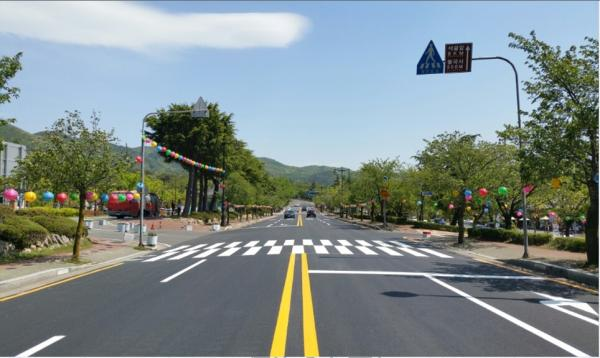

In [2]:
# 2. Load File
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('car1.jpg')
cv2_imshow(img)


In [3]:
print("width: {} pixels".format(img.shape[1]))   # x 
print("heigh: {} pixels".format(img.shape[0]))   # y . y가 먼저임 (notice)
print("channels: {}".format(img.shape[2]))
(height, width)=img.shape[:2]
center=(width//2,height//2)
center

width: 600 pixels
heigh: 358 pixels
channels: 3


(300, 179)

In [4]:
X = 268 #@param {type:"slider", min:0, max:600, step:1}
Y = 158 #@param {type:"slider", min:0, max:358, step:1}
SIZE = 100 #@param {type:"slider", min:0, max:100, step:1}
reSIZE = 300 #@param {type:"slider", min:0, max:500, step:1}

In [5]:
# img의 x,y위치에 해당하는 RGB값 
(b,g,r)=img[X,Y]
print("size:{}*{}. RGB:({},{},{})".format(X,Y,r,g,b))

size:268*158. RGB:(97,104,112)


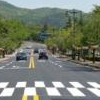

In [6]:
# crop cordination = image[y:y+h, x:x+w]
croped = img[Y:Y+SIZE, X:X+SIZE]
cv2_imshow(croped)

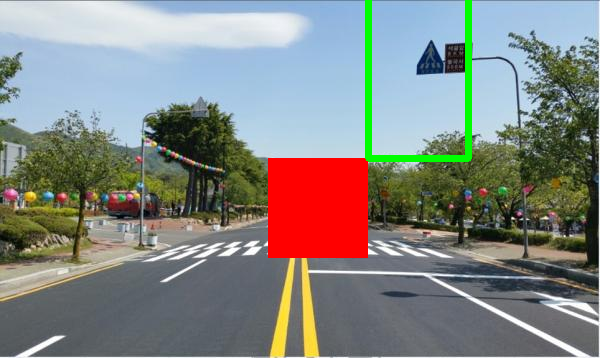

In [7]:
img[Y:Y+SIZE, X:X+SIZE]=(0,0,255)
cv2.rectangle(img, (X+SIZE, Y), (X+SIZE*2, Y-(SIZE*3)), (0,255, 0), 5)  # 굵기
cv2_imshow(img)

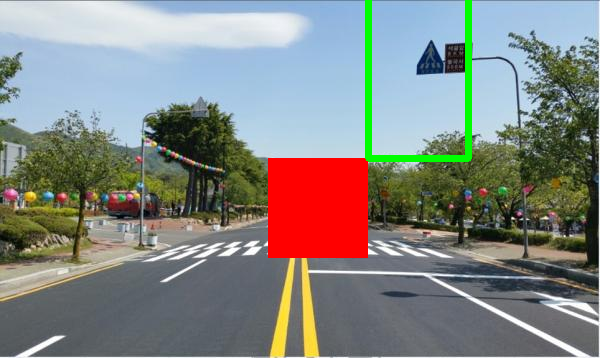

In [8]:
radius = int(SIZE/2)
cv2.circle(img, (X+SIZE*4, Y+radius), radius, (255,255, 0), -1)
cv2_imshow(img)

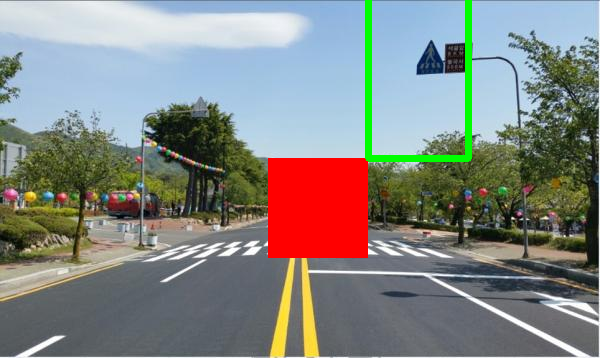

In [9]:
cv2.line(img, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)
cv2_imshow(img)

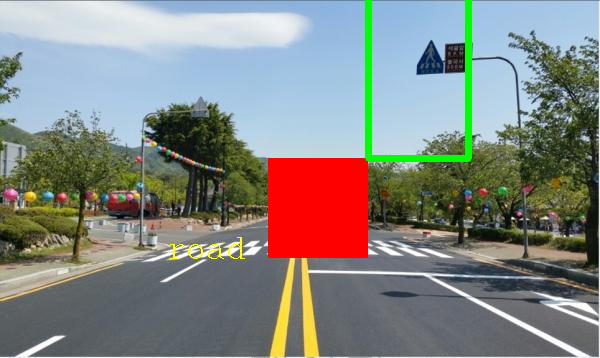

In [10]:
cv2.putText(img, 'road', (X-SIZE, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255))
cv2_imshow(img)

In [11]:
cv2.imwrite('car-copy.jpg', img)   #bgr

True

In [12]:
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error download: ', os.path.join(os, getcwd(), path))

download('car-copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

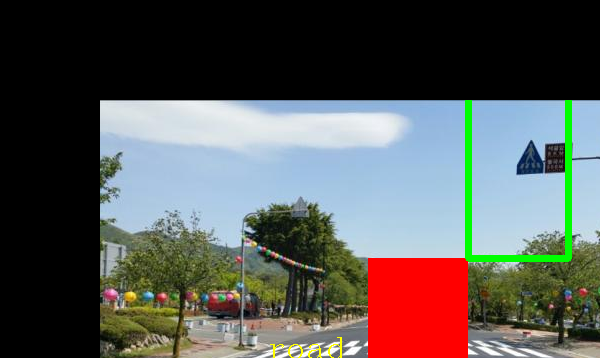

In [13]:
# Moved down: +, up: - and right: +, left - 
move=np.float32([[1,0,100],[0,1,100]]) # x를 100,y를 100만큼 이동
moved=cv2.warpAffine(img, move, (width, height))
cv2_imshow(moved)

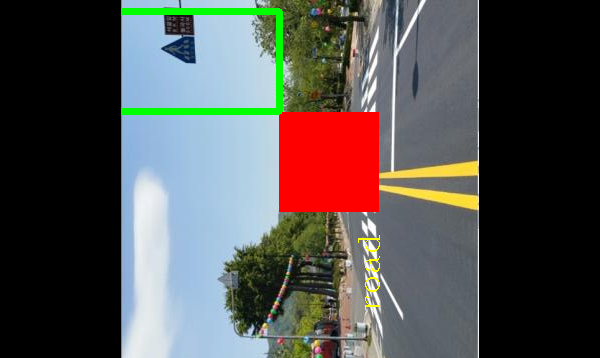

In [14]:
# 회전
rotate = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2. warpAffine(img, rotate, (width, height))
cv2_imshow(rotated)

https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

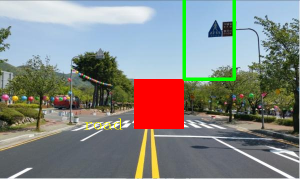

In [15]:
# 크기 재설정 
# reSIZE = width*ratio

ratio = reSIZE / width
dimension = (reSIZE, int(height*ratio))

resized = cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

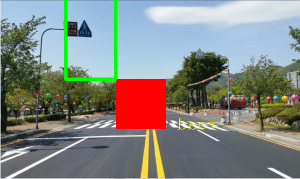

In [16]:
# 반전 Horizontal 1, Vertical 0, both -1 
flipped=cv2.flip(resized,1)
cv2_imshow(flipped)

# Masking : 일부를 가려서 원하는 부분만 봄

In [17]:
# white background = np.full((height,width,3), 255,np.unit8)
mask=np.zeros(img.shape[:2], dtype='uint8')  # black background
cv2.circle(mask, center, int(height/2), (255,255,255),-1)  # white circle

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

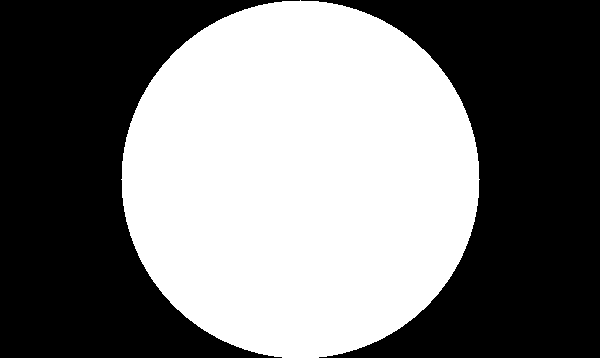

In [18]:
cv2_imshow(mask)

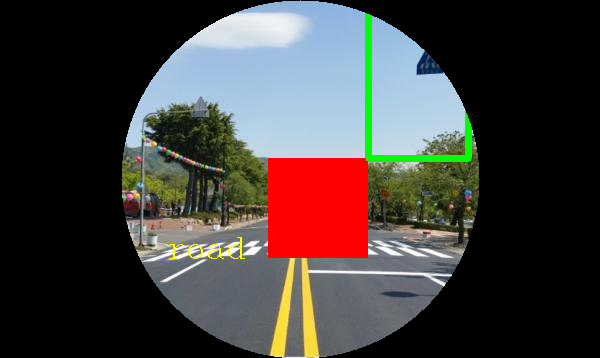

In [19]:
masked=cv2.bitwise_and(img,img,mask=mask)  # image와 mask의 공통인 부분 추출
cv2_imshow(masked)

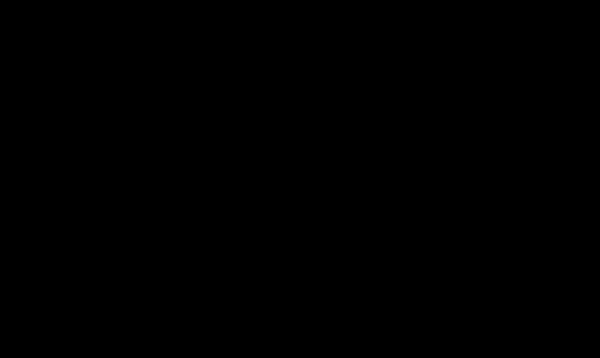

In [21]:
zeros=np.zeros(img.shape[:2], np.uint8)
cv2_imshow(zeros)

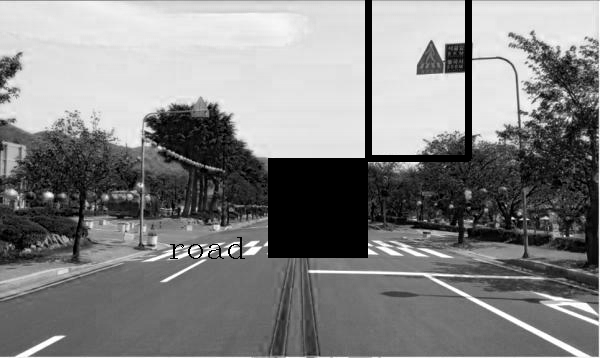

In [22]:
(Blue, Green, Red) =cv2.split(img)
cv2_imshow(Blue)

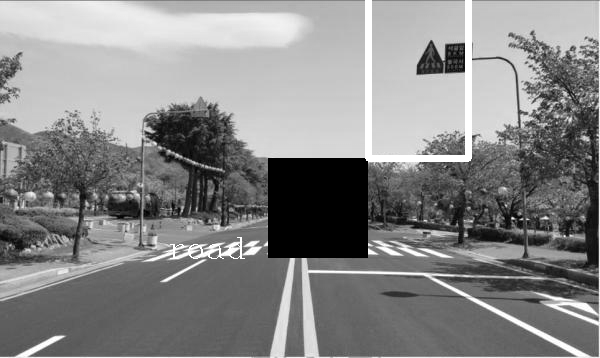

In [23]:
cv2_imshow(Green)

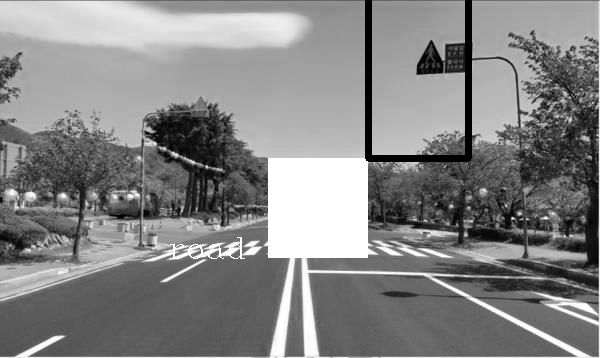

In [24]:
cv2_imshow(Red)

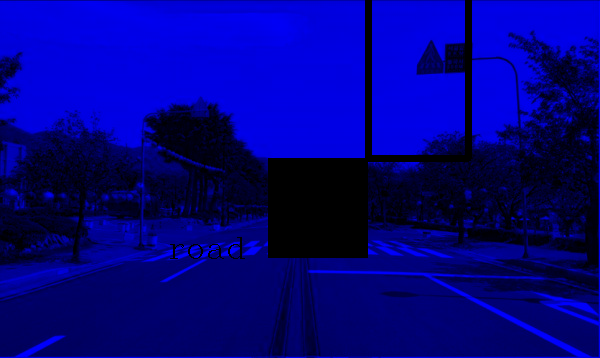

In [25]:
cv2_imshow(cv2.merge([Blue, zeros, zeros]))

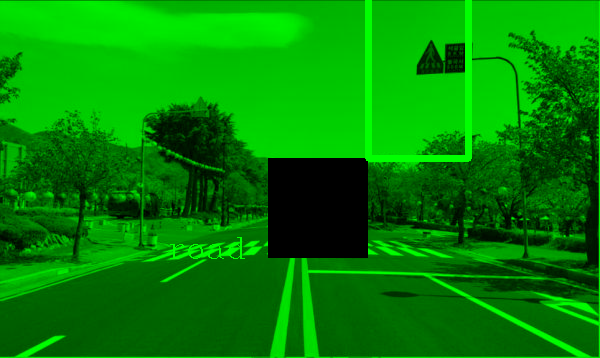

In [26]:
cv2_imshow(cv2.merge([zeros, Green, zeros]))

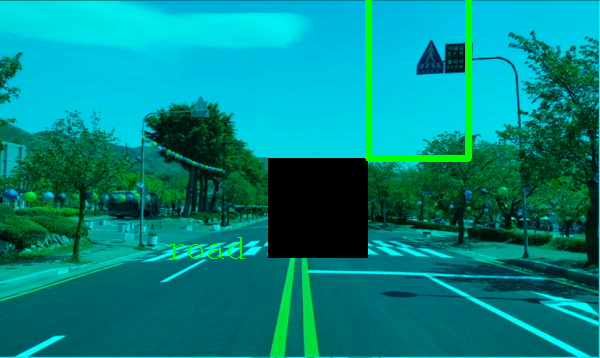

In [27]:
cv2_imshow(cv2.merge([Blue, Green, zeros]))

In [ ]:
# HSV : 색상(Hue) 채도(Saturation) 명도(Value)
# 명도 : 흰색 <-> 검은색
# 채도 : 형광 <->무채색

In [ ]:
# machineLearning이 용이하도록(효율 up) 색감 조정 

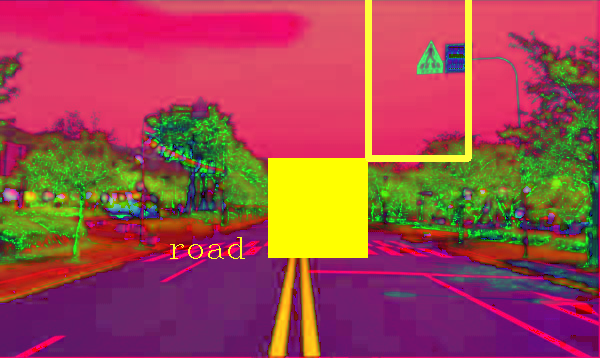

In [28]:
hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

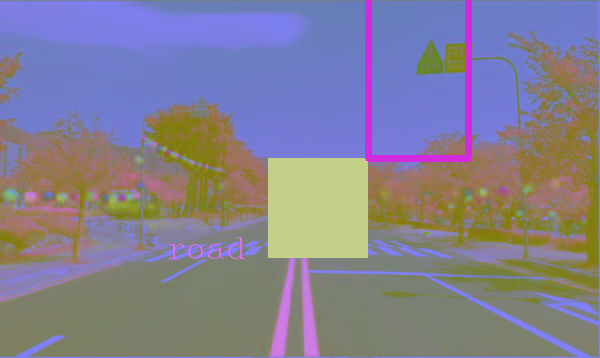

In [31]:
lab=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)


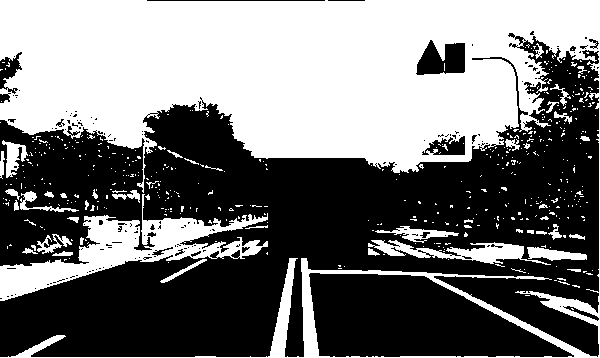

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 127, 255,0)  
cv2_imshow(thresh)

717


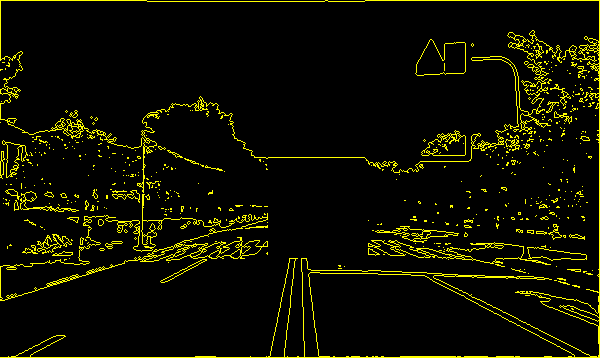

In [44]:
contours, hierachy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1000]
print(len(contours))
back=np.zeros((height, width, 3), np.uint8)
for i in range(len(contours)):
  cv2.drawContours(back, contours, i, (0,255,255))
cv2_imshow(back)

10


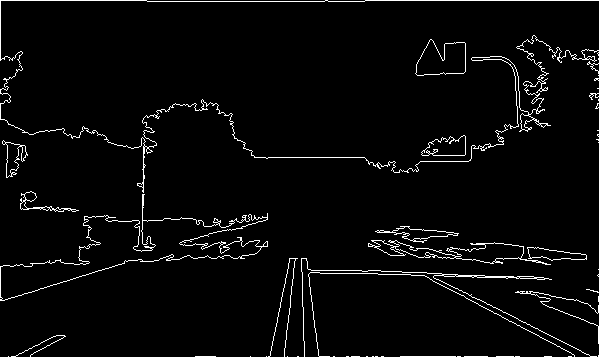

In [45]:
contours, hierachy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
print(len(contours))
back=np.zeros((height, width, 3), np.uint8)
for i in range(len(contours)):
  cv2.drawContours(back, contours, i, (255,255,255))
cv2_imshow(back)